In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [92]:
df = pd.read_csv("../Section 44 - Linear Discriminant Analysis (LDA)/Wine.csv")
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [93]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X.shape, y.shape

((178, 13), (178,))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [95]:
#scaling after splitting is different with scaling before splitting
'''
    It makes a HUGE difference and is one of the most common errors in data science.  
    Part of the reason is that most software tools are not allowing you to do this in the right way.
    Luckily enough, RapidMiner is not "most software tools" and allows you to do this right.

    Here is the answer: You should NEVER do anything which leaks information about your testing data BEFORE a split.
    If you normalize before the split, then you will use the testing data to calculate the range or distribution of this data which leaks this information also into the testing data.  
    And that "contaminates" your data and will lead to over-optimistic performance estimations on your testing data.  
    This is by the way not just true for normalization but for all data preprocessing steps which change data based on all data points including also feature selection.  

    Just to be clear: This contamination does not have to lead to over-optimistic performance estimations but often it will.
    What you SHOULD do instead is to create the normalization only on the training data 
    and use the preprocessing model coming out of the normalization operator.  
    This preprocessing model can then be applied like any other model 
    on the testing data as well and will change the testing data based on the training data (which is ok) but not the other way around.

    The process below will show you how this works in general
'''
sc = StandardScaler()
X_train = sc.fit_transform(X_train, y_train)
X_test = sc.fit_transform(X_test, y_test)

X_train.shape, X_test.shape

((142, 13), (36, 13))

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
#we only fit transform the X_train only not X_test
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

X_train.shape, X_test.shape

((142, 2), (36, 2))

In [97]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [98]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cm, ac

(array([[ 9,  0,  0],
        [ 0, 18,  0],
        [ 0,  0,  9]], dtype=int64), 1.0)

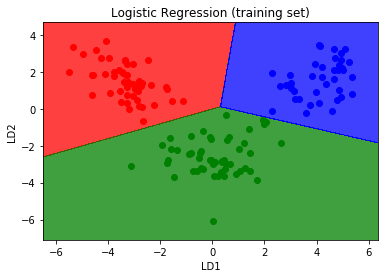

In [99]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:,0].min() -1, stop=X_set[:,0].max() + 1, step=0.01),\
    np.arange(start = X_set[:,1].min() -1, stop=X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array((X1.ravel(), X2.ravel())).T).reshape(X1.shape),
            alpha = 0.75, cmap= ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

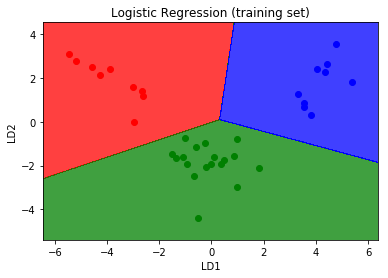

In [100]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:,0].min() -1, stop=X_set[:,0].max() + 1, step=0.01),\
    np.arange(start = X_set[:,1].min() -1, stop=X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array((X1.ravel(), X2.ravel())).T).reshape(X1.shape),
            alpha = 0.75, cmap= ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()